# Fitness of yeast KO-strains in pesticidal environment (Atrazine)

A plate reader was used to test yeast KO-strains when treated with varying concentrations of pesticide.

## Data preprocessing
The xlsx file generated by the plate reader is put into a dataframe.

In [2]:
import pandas as pd
import numpy as np

def get_dataframe_from_xlsx(path):
    df = pd.read_excel(path,header=None)

    df_list = np.split(df, df[df.isnull().all(1)].index)
    df_list_new = []
    for i in range(len(df_list)):
        df = df_list[i]
        df.columns = df.iloc[0 if i == 0 else 1] #set header
        df = df.iloc[1 if i == 0 else 2:] #delete first row (header)
        df = df.set_index('Kinetic read') #set index
        df = df[df.columns.dropna()] #remove empty columns
        df = df.dropna() #remove all empty lines
        df_list_new.append(df)
    return pd.concat(df_list_new,axis=1)

df = get_dataframe_from_xlsx('../data/20200723_plate-fitness.xlsx')
df.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
Kinetic read,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:04:22,0.143,0.144,0.154,0.196,0.154,0.178,0.153,0.135,0.221,0.155,...,0.429,0.54,0.445,0.1,0.474,0.507,0.606,0.501,0.617,0.501
1900-01-01 00:09:22,0.144,0.145,0.154,0.195,0.154,0.178,0.151,0.134,0.224,0.154,...,0.428,0.54,0.452,0.1,0.475,0.512,0.601,0.501,0.617,0.498
1900-01-01 00:14:22,0.144,0.145,0.153,0.194,0.155,0.179,0.151,0.134,0.223,0.155,...,0.428,0.541,0.454,0.1,0.476,0.514,0.597,0.503,0.617,0.5
1900-01-01 00:19:22,0.143,0.146,0.154,0.195,0.154,0.168,0.151,0.134,0.225,0.154,...,0.426,0.542,0.457,0.1,0.478,0.516,0.595,0.503,0.617,0.5
1900-01-01 00:24:22,0.142,0.145,0.153,0.195,0.154,0.17,0.151,0.135,0.226,0.153,...,0.426,0.541,0.457,0.1,0.478,0.517,0.589,0.502,0.617,0.497


In [3]:
def get_series(df,i):
    return df[i][:-1]

The following function returns the list of indecies of the replicates for a given strain and concentration. This function depends on the loading pattern of the plate.

In [4]:
import string

alph = string.ascii_uppercase
def get_replicates_index(s,c,corrected=False): #s is the strain [0,1,2,3] and c the concentration [0,1,2,3,4,5]
    if corrected:
        return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1)]
    else:
        if s == 0:
            return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1)]
        else:
            return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1),alph[s*2+1]+str((c+1)+6)]

`get_series_mean` returns the data points (mean of replicates) as well as the standard error of the mean. The very last measurement is excluded as the timestamp is the same as for the first measurement because the experiment did run for exactly 24h. Having the same time stamp for two measurements messes up the plots.

In [5]:
def get_series_mean(df,s,c,corrected=False):
    i = get_replicates_index(s,c,corrected)
    return df[i][:-1].mean(axis=1), df[i][:-1].sem(axis=1)

Generate a list of timestamps. The last timestamp is excluded. Timestamps are corrected by 4 minutes and 22 seconds which corresponds to the first measurement.

In [6]:
def get_timestamps(df):
    return [pd.Timestamp(df.index.to_list()[i]-pd.DateOffset(minutes=4,seconds=22)).strftime('%H:%M:%S') for i in range(len(df.index.to_list())-1)]

## Plots

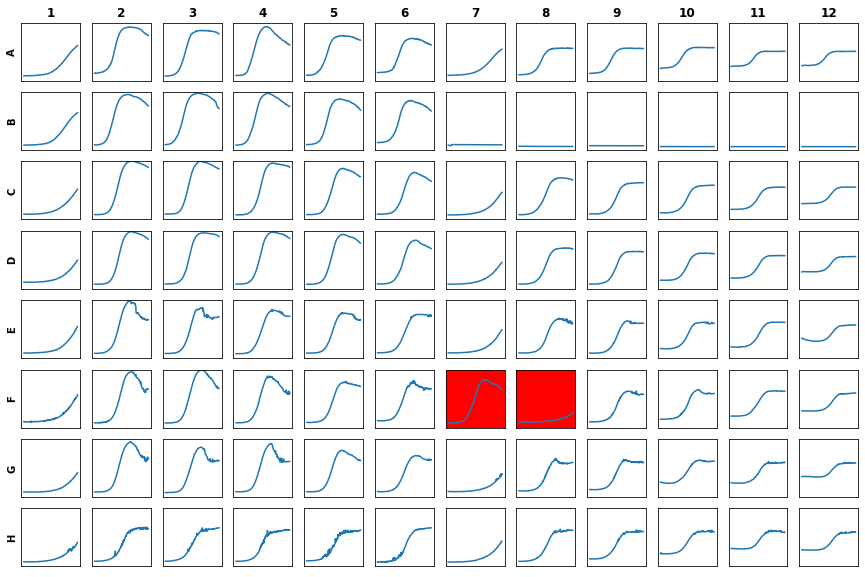

In [7]:
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
fig, axs = plt.subplots(8, 12)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(8):
    axs[i,0].set_ylabel(alph[i],fontweight='bold')
    for j in range(12):
        plt.sca(axs[i,j])
        if(i==0):
            plt.title(j+1,fontweight='bold')
        y = get_series(df,alph[i]+str(j+1))
        plt.plot(y)
        plt.xticks([])
        plt.yticks([])
        axs[i,j].set_ylim([0, 1.75])
axs[5,6].set_facecolor('red')
axs[5,7].set_facecolor('red')
plt.show()

Wells F7 and F8 have probably been misloaded. F7 should be a replicate of E1, E7 and F1. The fourth replicate is therefor not taken into account.

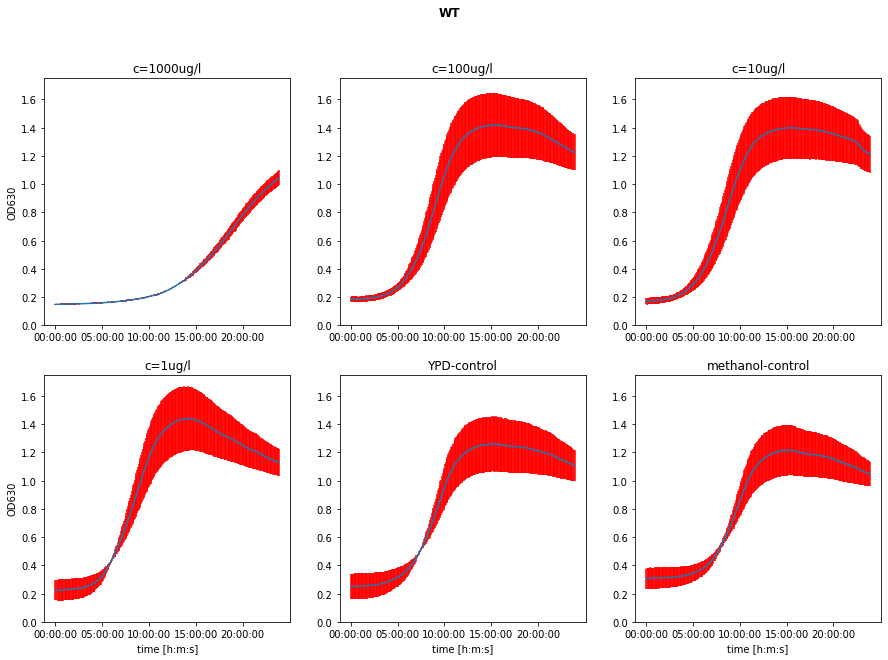

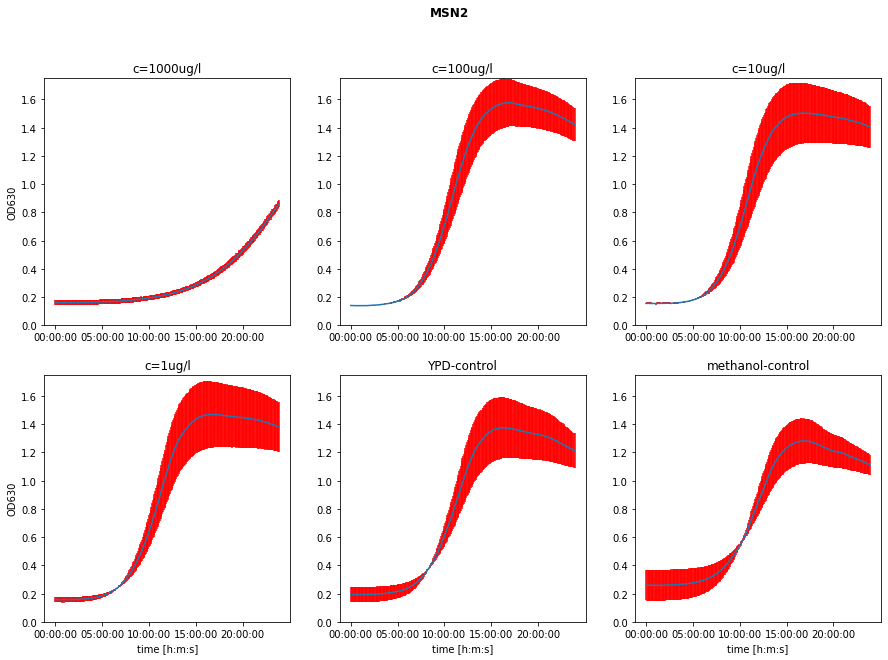

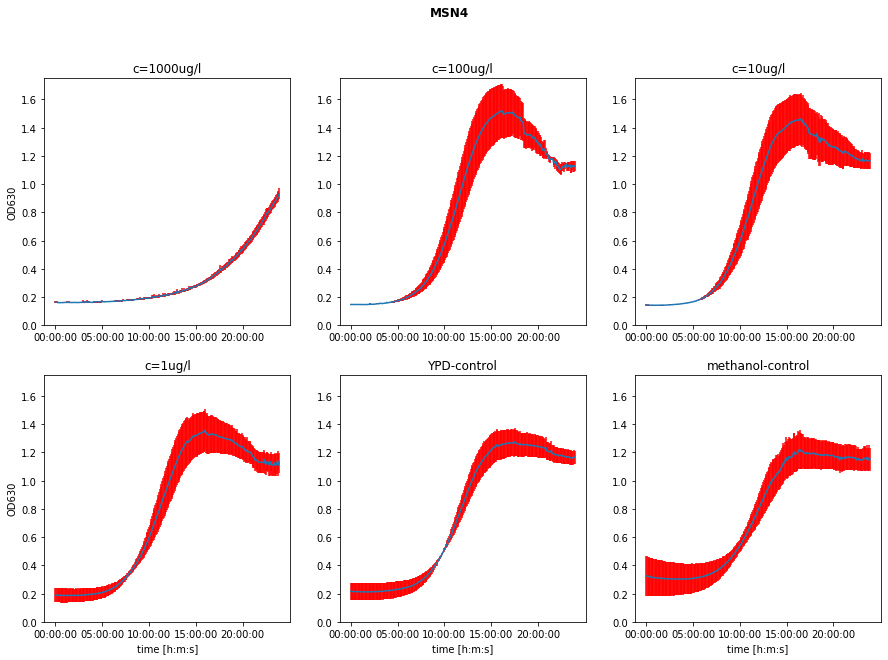

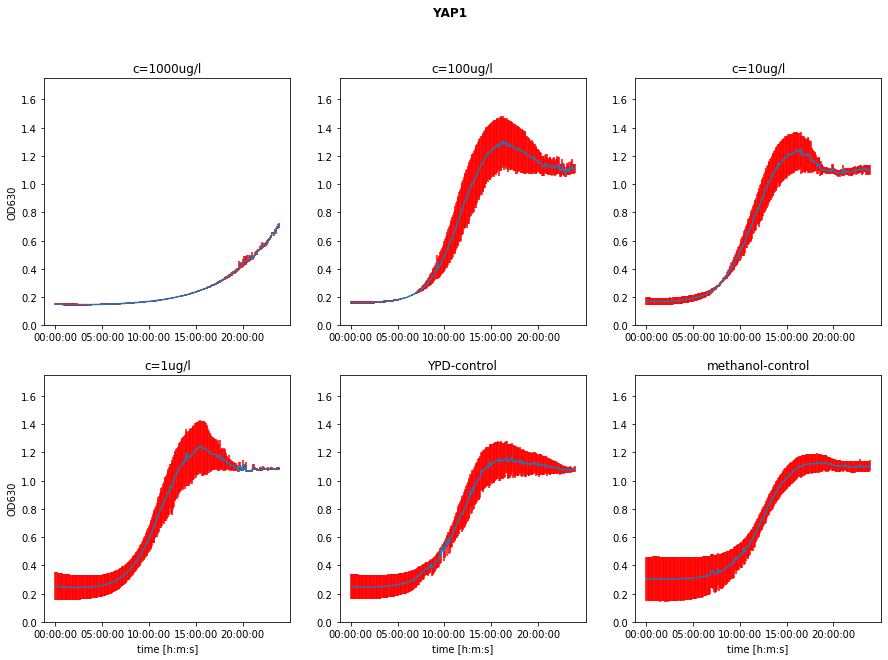

In [8]:
import matplotlib.pyplot as plt

x = get_timestamps(df)
t = ['c=1000ug/l','c=100ug/l','c=10ug/l','c=1ug/l','YPD-control','methanol-control']
supt = ['WT','MSN2','MSN4','YAP1']
for n in range(4):
    fig, axs = plt.subplots(2, 3)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    for i in range(2):
        for j in range(3):
            y, se = get_series_mean(df,n,i*3+j,True)
            plt.sca(axs[i,j])
            plt.errorbar(x,y,yerr=se,ecolor='red')
            plt.xticks(np.arange(0,288,60))
            plt.title(t[i*3+j])
            axs[i,j].set_ylim([0, 1.75])
    axs[0,0].set_ylabel('OD630')
    axs[1,0].set_ylabel('OD630')
    axs[1,0].set_xlabel('time [h:m:s]')
    axs[1,1].set_xlabel('time [h:m:s]')
    axs[1,2].set_xlabel('time [h:m:s]')
    fig.suptitle(supt[n],fontweight='bold')
    plt.show()

Plotting the data ordered by strain. In blue the OD630 is plotted against time (mean of 4 replicates, 3 replicates for WT). In red is the standard error of the mean.

Problem with these plots: The background was not subtracted and the individual growth curves start at different ODs.

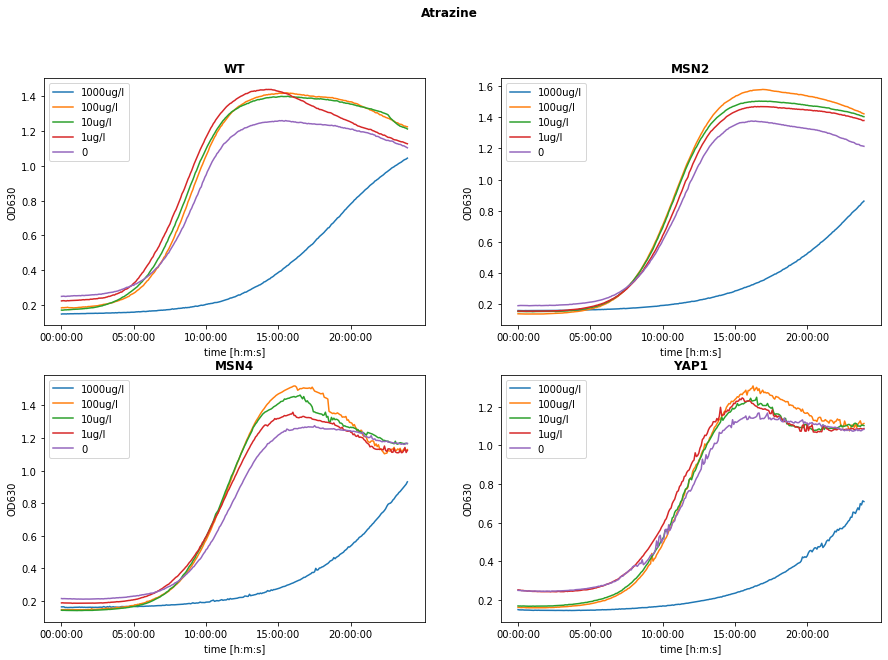

In [9]:
import matplotlib.pyplot as plt

x = get_timestamps(df)
supt = ['WT','MSN2','MSN4','YAP1']
conc = ['1000ug/l','100ug/l','10ug/l','1ug/l','0']
fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        for n in range(0,5): # excluding highest concentration and methanol control
            plt.sca(axs[i,j])
            y, se = get_series_mean(df,i*2+j,n,True)
            plt.plot(x,y)
        plt.xticks(np.arange(0,288,60))
        plt.title(supt[i*2+j],fontweight='bold')
        plt.legend(conc)
        axs[i,j].set_ylabel('OD630')
        axs[i,j].set_xlabel('time [h:m:s]')
fig.suptitle('Atrazine',fontweight='bold')
plt.show()

Growth of liquid yeast culture has been measured using a plate reader on a V-shaped 96-well plate. Each curve is the mean of 3 replicates. The control is YPD medium. A methanol control was also used but is not shwon here. At the end of the experiment it was visibly confirmed that cells settled down in the V shape of the plate. For the next iteration we switched to a flat plate and increased the shaking intensity. We also used 10-times lower concentration for the next plate. Although 1000ug/l has a visible impact on the growth behaviour, this concentration is eventually of no interest to our project as it is unrealistical to find drinking water in Switzerland with this amount of contamination.

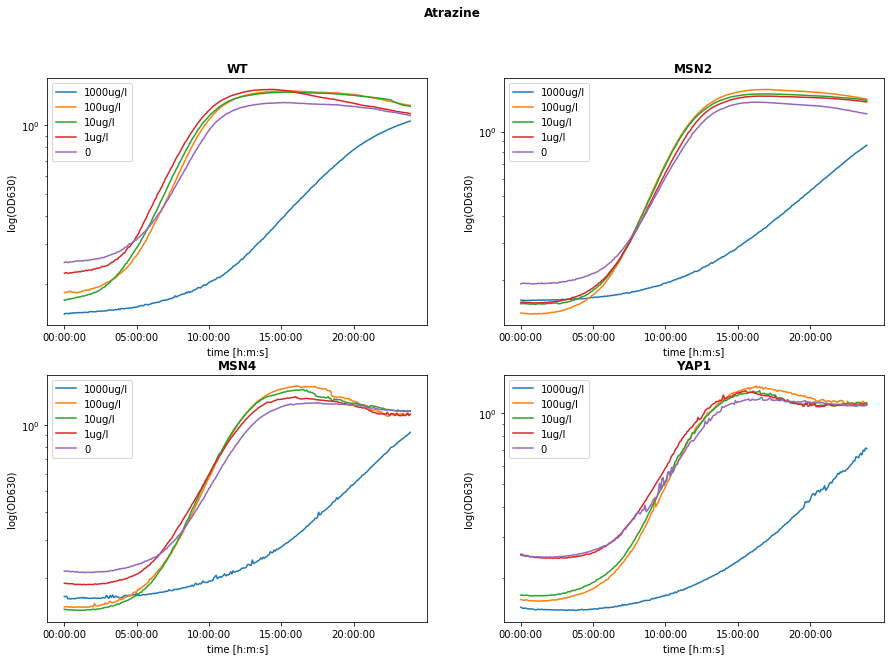

In [10]:
import matplotlib.pyplot as plt

x = get_timestamps(df)
supt = ['WT','MSN2','MSN4','YAP1']
conc = ['1000ug/l','100ug/l','10ug/l','1ug/l','0']
fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        for n in range(0,5): # excluding highest concentration and methanol control
            plt.sca(axs[i,j])
            y, se = get_series_mean(df,i*2+j,n,True)
            plt.semilogy(x,y)
        plt.xticks(np.arange(0,288,60))
        plt.title(supt[i*2+j],fontweight='bold')
        plt.legend(conc)
        axs[i,j].set_ylabel('log(OD630)')
        axs[i,j].set_xlabel('time [h:m:s]')
fig.suptitle('Atrazine',fontweight='bold')
plt.show()

# Estimating growth rates

First step: isolating exponential growth phase by ignoring data with OD < 0.3 and after the climax.

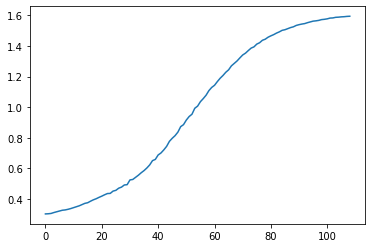

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def logistic(x,x0,y0,k,L):
    return L/(1+np.exp(-k*(x-x0))) + y0

y = get_series(df,'A2')
buf = []
for j in y:
    if j > 0.3:
        if len(buf) > 0 and j < buf[-1]:
            break
        buf.append(j)
plt.plot(buf)
plt.show()